In [1]:
from fastai import *
from fastai.vision import *
import os
import re
from pathlib import Path

In [5]:
# path = Path("/Users/davidabraham/Downloads/asl-alphabet-medium/asl_alphabet_train/")

In [6]:
# fnames_small = list(path.glob('**/*.jpg'))
# for fname in fnames_small:
#     image_no = re.search(r"\d+",str(fname))
#     if int(image_no.group()) > 1500:
#         os.remove(fname)
    

In [7]:
path = Path("/Users/davidabraham/Downloads/asl-alphabet-small/asl_alphabet_train/")
fnames = list(path_train.glob('**/*.jpg'))
fnames[:5]

[PosixPath('/Users/davidabraham/Downloads/asl-alphabet-small/asl_alphabet_train/R/R228.jpg'),
 PosixPath('/Users/davidabraham/Downloads/asl-alphabet-small/asl_alphabet_train/R/R200.jpg'),
 PosixPath('/Users/davidabraham/Downloads/asl-alphabet-small/asl_alphabet_train/R/R566.jpg'),
 PosixPath('/Users/davidabraham/Downloads/asl-alphabet-small/asl_alphabet_train/R/R572.jpg'),
 PosixPath('/Users/davidabraham/Downloads/asl-alphabet-small/asl_alphabet_train/R/R214.jpg')]

In [3]:
# pat = r"(?#/)([A-Z]|space|nothing|del)(?=/)"

In [9]:
# data = ImageDataBunch.from_name_re(path_train,fnames,pat,ds_tfms = get_transforms(),size =224,num_workers = 0)
path = Path("/Users/davidabraham/Downloads/asl-alphabet/asl_alphabet_train/")
data = ImageDataBunch.from_folder(path,ds_tfms = get_transforms(),size =224,valid_pct = 0.3,num_workers = 0).normalize(imagenet_stats)

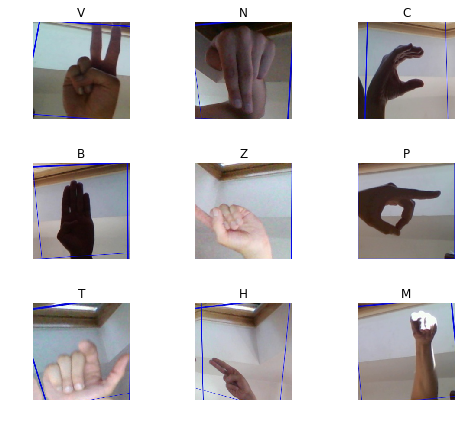

In [10]:
data.show_batch(rows = 3, figsize = (7,6))

In [11]:
learn = cnn_learner(data,models.resnet34,metrics = error_rate)

In [ ]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time


In [ ]:
interp = ClassificationInterpretation.from_learner(learn)

In [ ]:
interp.plot_top_losses(9, figsize=(6,6))

In [ ]:
interp.plot_confusion_matrix()

In [ ]:
img = learn.data.train_ds[0][0]
learn.predict(img)